Simulated DR2 lensed QSO query final

In [1]:
import numpy as np
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
%matplotlib inline

In [2]:
mp.rcParams['figure.figsize'] = (12, 8)

In [3]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

In [4]:
from context import gaiapix
import gaiapix.gaiapix as hp

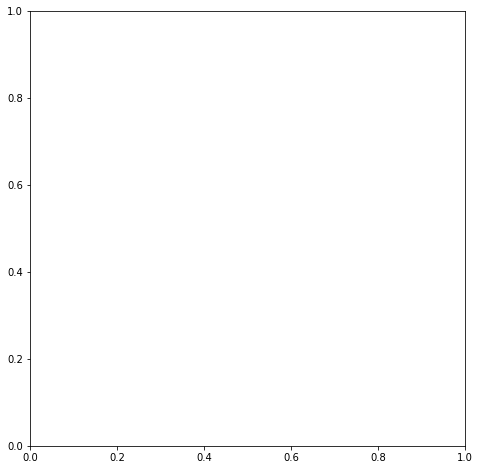

In [5]:
from context import lens
import lens.sie.random as sierd

assume that the 2 files have the same hp level 

In [6]:
def addGalactic(df):
    df['l'] = SkyCoord(df.ra.values,df.dec.values,unit=u.deg).galactic.l.wrap_at(180*u.degree)
    df['b'] = SkyCoord(df.ra.values,df.dec.values,unit=u.deg).galactic.b.deg

# QSO 

In [7]:
%time d = pd.read_csv("../data/DR2simALLwiseQSO.csv")

CPU times: user 2.61 s, sys: 178 ms, total: 2.78 s
Wall time: 2.78 s


set source id

In [8]:
hpX = hp.gaiapix(12)
d['source_id'] = hpX.angle2pixel(d.ra,d.dec)*hpX.s + d.index

In [9]:
d[:10]

,Unnamed: 0,WISEA,RAJ2000,DEJ2000,W1-W2,W2-W3,W1mag,gmag,z,f_z,...,phot_g_mean_mag,ra_error,dec_error,pmra_error,pmdec_error,pmra,pmdec,parallax_error,parallax,source_id
0,1165863,b'J083549.39+094912.1',128.955804,9.820033,1.32,2.57,14.21,NaN,NaN,b'',...,19.7495,4.553143,4.553143,1.036956,1.036956,0.291004,0.417160,0.538726,0.751462,599752050711986176
1,300472,b'J094557.16-141845.9',146.488179,-14.312753,1.37,4.19,16.90,NaN,NaN,b'',...,18.7485,0.830704,0.830704,0.568752,0.568752,0.181795,-0.367368,0.299958,-0.262406,5687304399538356225
2,651276,b'J235900.72+022959.5',359.753016,2.499887,0.86,3.40,14.85,NaN,NaN,b'',...,18.4335,0.528376,0.528376,0.470805,0.470805,-0.223267,0.641112,0.250515,0.160083,2739519188669300738
3,413684,b'J124958.08-241800.8',192.492017,-24.300225,1.14,3.89,16.69,NaN,NaN,b'',...,19.8965,6.046080,6.046080,1.132570,1.132570,-0.047276,0.135750,0.588094,-1.524438,3498614457343410179
4,547139,b'J183053.94-551740.1',277.724750,-55.294499,1.15,2.58,13.76,NaN,NaN,b'',...,18.5105,0.588011,0.588011,0.493067,0.493067,0.012554,-0.555721,0.261744,0.068514,6650766959619080196
5,1282153,b'J012553.87+051733.4',21.474470,5.292635,1.01,2.78,15.36,NaN,NaN,b'',...,18.8815,1.017630,1.017630,0.615999,0.615999,0.556557,0.590713,0.323853,0.342624,2563575956467875845
6,612294,b'J203851.92-110153.1',309.716354,-11.031419,0.93,2.89,15.44,NaN,NaN,b'',...,19.0075,1.241449,1.241449,0.664374,0.664374,-0.043560,1.029095,0.348358,0.196895,6901415856534716422
7,1033550,b'J170033.94+465100.7',255.141420,46.850216,1.37,2.29,15.50,NaN,NaN,b'',...,20.4285,18.137655,18.137655,1.558446,1.558446,-0.188717,-1.021463,0.810633,0.174341,1359906698839457799
8,671447,b'J220442.57+115123.3',331.177393,11.856485,1.47,3.12,15.19,NaN,NaN,b'',...,19.3225,2.098177,2.098177,0.802590,0.802590,0.463751,-0.322490,0.418622,-0.417544,2728224695991140360
9,1267551,b'J002133.88+303303.0',5.391187,30.550859,1.07,3.92,16.60,NaN,NaN,b'',...,19.4275,2.521412,2.521412,0.854780,0.854780,0.183541,-1.375216,0.445259,0.073941,2862111917667778569


In [10]:
len(d)

393907

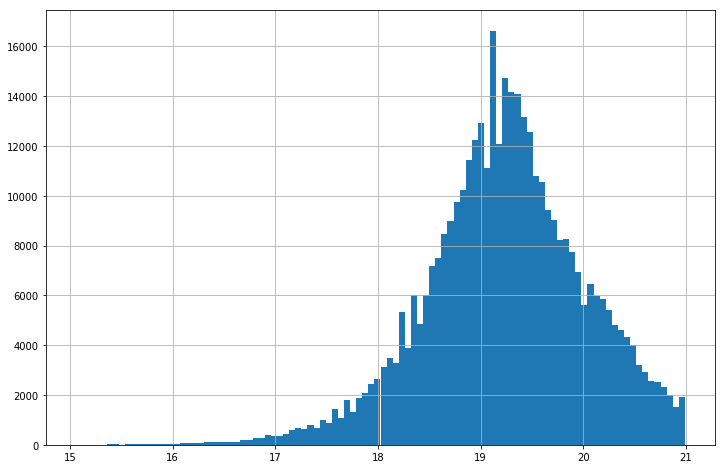

In [11]:
d.phot_g_mean_mag.hist(bins=100)

In [12]:
columns = ['ra','ra_error','dec','dec_error',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag']

In [13]:
d['astrometric_pseudo_colour'] = np.random.normal(1.7,0.2,len(d))

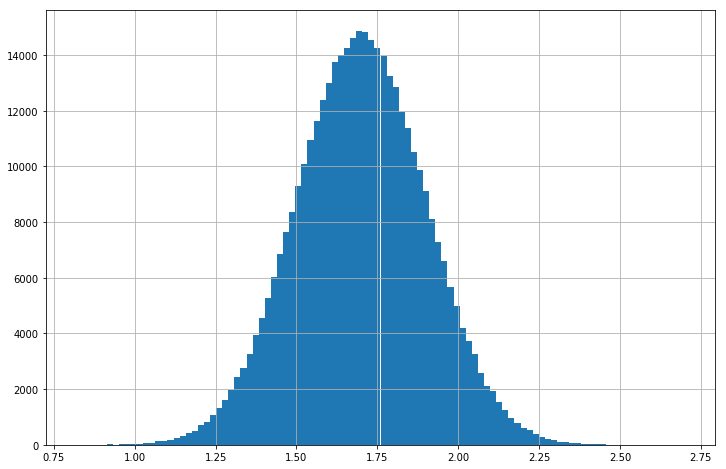

In [14]:
d.astrometric_pseudo_colour.hist(bins=100)

In [15]:
columns = ['ra','ra_error','dec','dec_error',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag','source_id','astrometric_pseudo_colour']

In [16]:
d[columns][:10]

,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour
0,128.955804,4.553143,9.820033,4.553143,0.751462,0.538726,0.291004,1.036956,0.417160,1.036956,19.7495,599752050711986176,1.543304
1,146.488179,0.830704,-14.312753,0.830704,-0.262406,0.299958,0.181795,0.568752,-0.367368,0.568752,18.7485,5687304399538356225,1.414396
2,359.753016,0.528376,2.499887,0.528376,0.160083,0.250515,-0.223267,0.470805,0.641112,0.470805,18.4335,2739519188669300738,1.551746
3,192.492017,6.046080,-24.300225,6.046080,-1.524438,0.588094,-0.047276,1.132570,0.135750,1.132570,19.8965,3498614457343410179,2.024204
4,277.724750,0.588011,-55.294499,0.588011,0.068514,0.261744,0.012554,0.493067,-0.555721,0.493067,18.5105,6650766959619080196,1.621323
5,21.474470,1.017630,5.292635,1.017630,0.342624,0.323853,0.556557,0.615999,0.590713,0.615999,18.8815,2563575956467875845,2.059415
6,309.716354,1.241449,-11.031419,1.241449,0.196895,0.348358,-0.043560,0.664374,1.029095,0.664374,19.0075,6901415856534716422,1.866243
7,255.141420,18.137655,46.850216,18.137655,0.174341,0.810633,-0.188717,1.558446,-1.021463,1.558446,20.4285,1359906698839457799,1.706364
8,331.177393,2.098177,11.856485,2.098177,-0.417544,0.418622,0.463751,0.802590,-0.322490,0.802590,19.3225,2728224695991140360,2.053970
9,5.391187,2.521412,30.550859,2.521412,0.073941,0.445259,0.183541,0.854780,-1.375216,0.854780,19.4275,2862111917667778569,1.581696


In [17]:
d['qsoid'] = d['source_id']
d['type'] = "QSO"

# STAR : the contaminant

In [18]:
%time m = pd.read_csv("../data/contaminantModel.csv")

CPU times: user 37.3 ms, sys: 10.8 ms, total: 48.1 ms
Wall time: 48.9 ms


assume that the contaminant model was comupted with hp level 6

In [19]:
level=6

some util functions

Text(0.5,1,'ALLwise DR2 expectation')

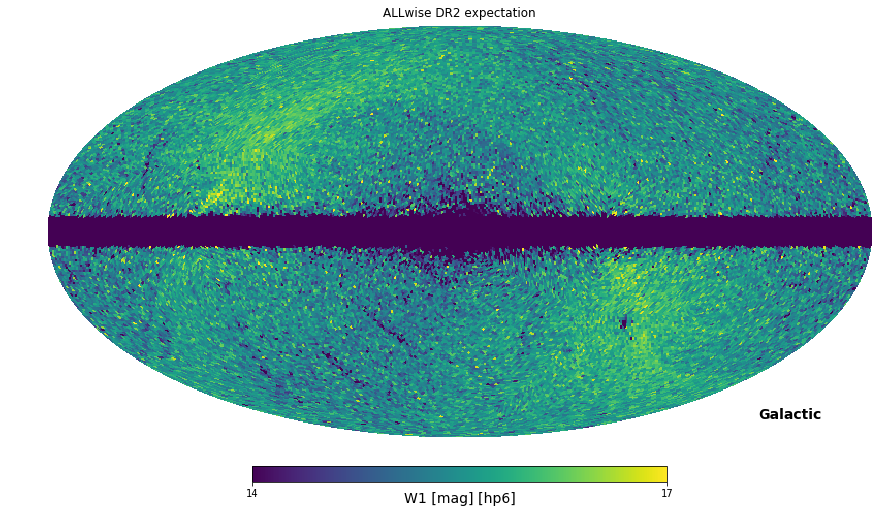

In [20]:
hpX = hp.gaiapix(level)
hpX.setHpValues(d,keyValue='W1mag')
f = plt.figure()
hpX.plot(f,vmin=14,vmax=17,cmap=mp.cm.viridis,coord='G',unit="W1 [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

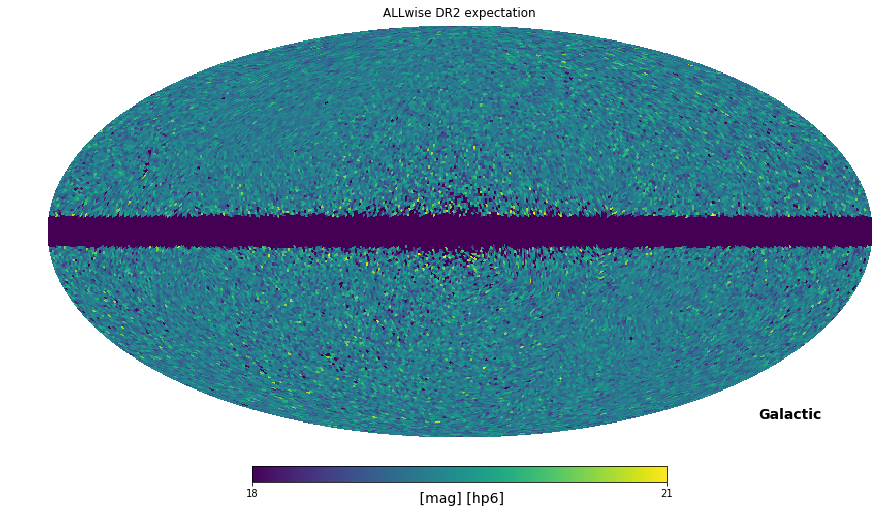

In [21]:
hpX = hp.gaiapix(level)
hpX.setHpValues(d,keyValue='phot_g_mean_mag')
f = plt.figure()
hpX.plot(f,vmin=18,vmax=21,cmap=mp.cm.viridis,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

In [22]:
d['hp'] = hpX.angle2pixel(d.RAJ2000,d.DEJ2000)

set the number of outliers using a poisson distribution to generate the number of condaminant around each qso

In [23]:
res = d[['RAJ2000','DEJ2000','WISEA','source_id']].copy()
res.columns = ['ra','dec','WISEA','qsoid']
res['hp'] = hpX.angle2pixel(res.ra,res.dec)
addGalactic(res)
res = res.join(m,on='hp',rsuffix='m')
res['n_outliers'] = np.random.poisson(res.n_outliers)

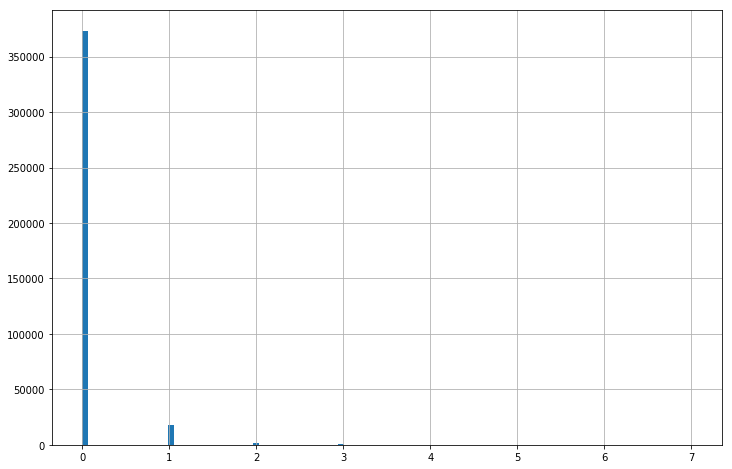

In [24]:
res.n_outliers.hist(bins=100)

In [25]:
res.groupby(res.n_outliers).hp.count()

n_outliers
0    373498
1     17901
2      2034
3       364
4        86
5        17
6         4
7         3
Name: hp, dtype: int64

healpix does not seems to work very well for integer... there should be no red dots 

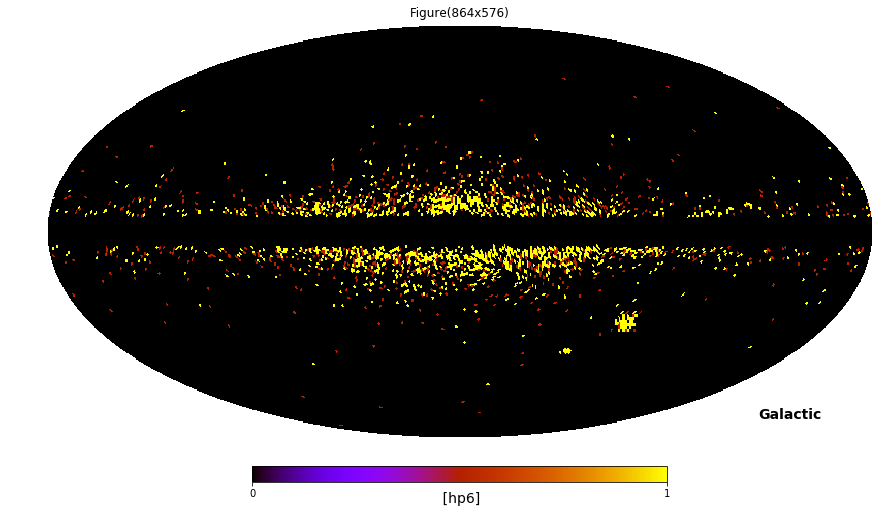

In [26]:
hpX = hp.gaiapix(level)
hpX.setHpValues(res,keyValue='n_outliers')
f = plt.figure()
hpX.plot(f,vmin=0,vmax=1,cmap=mp.cm.gnuplot,coord='G')

total number of outliers (ie stars and not QSO)

it seems too high by at least a factor 2

In [27]:
res.n_outliers.sum()

23535

In [28]:
res[res.n_outliers>0].n_outliers.sum()

23535

In [29]:
len(res)

393907

/Users/abombrun/anaconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


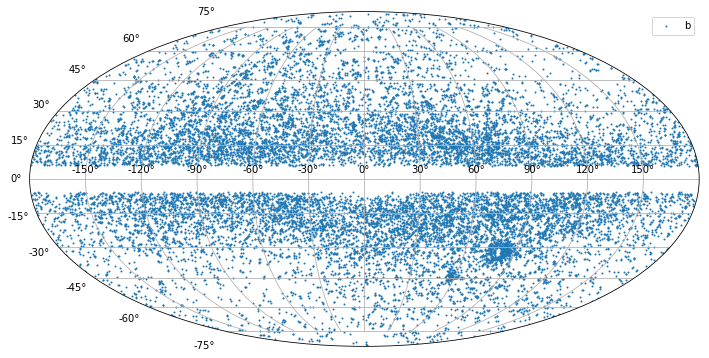

In [30]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==1]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

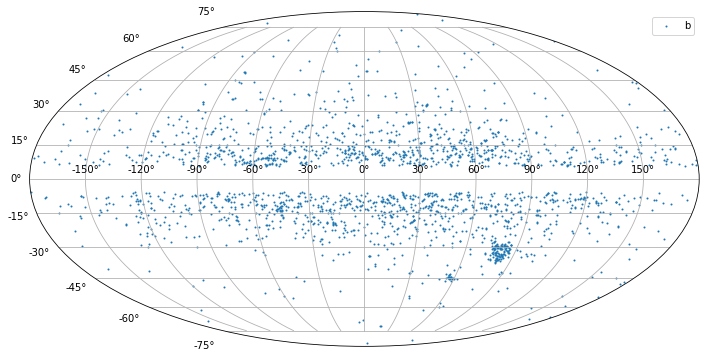

In [31]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==2]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

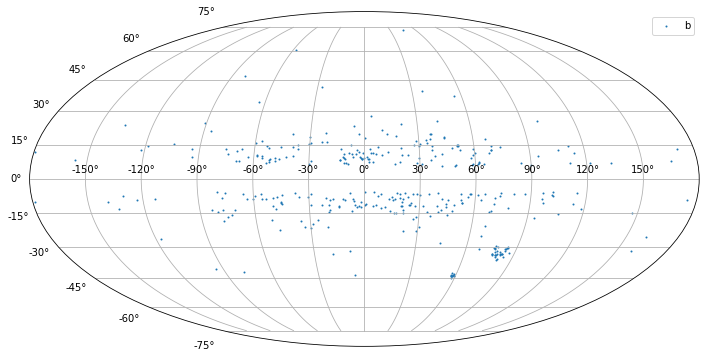

In [32]:
scale = u.deg.to(u.rad)
s = res[res.n_outliers==3]
plt.subplot(111,projection="mollweide")
plt.scatter(-s.l*scale,s.b*scale,s=1)
plt.grid()
plt.legend()

generate outliers

In [33]:
res[:10]

,ra,dec,WISEA,qsoid,hp,l,b,Unnamed: 0,density,hpm,prob,n_outliers
0,128.955804,9.820033,b'J083549.39+094912.1',599752050711986176,4261,-144.102073,27.614692,4261,0.000000,4261,0.000000e+00,0
1,146.488179,-14.312753,b'J094557.16-141845.9',5687304399538356225,40410,-110.258152,28.835045,40410,0.000000,40410,0.000000e+00,0
2,359.753016,2.499887,b'J235900.72+022959.5',2739519188669300738,19465,97.780830,-57.788959,19465,0.000000,19465,0.000000e+00,0
3,192.492017,-24.300225,b'J124958.08-241800.8',3498614457343410179,24859,-57.496428,38.570300,24859,0.000000,24859,0.000000e+00,0
4,277.724750,-55.294499,b'J183053.94-551740.1',6650766959619080196,47256,-20.154007,-19.238966,47256,0.000012,47256,8.814109e-11,0
5,21.474470,5.292635,b'J012553.87+051733.4',2563575956467875845,18215,138.621400,-56.525752,18215,0.000000,18215,0.000000e+00,0
6,309.716354,-11.031419,b'J203851.92-110153.1',6901415856534716422,49037,35.017872,-28.808658,49037,0.000006,49037,4.407054e-11,0
7,255.141420,46.850216,b'J170033.94+465100.7',1359906698839457799,9662,72.722732,38.008367,9662,0.000006,9662,4.407054e-11,0
8,331.177393,11.856485,b'J220442.57+115123.3',2728224695991140360,19385,71.349056,-33.835919,19385,0.000000,19385,0.000000e+00,0
9,5.391187,30.550859,b'J002133.88+303303.0',2862111917667778569,20336,115.357190,-31.881133,20336,0.000000,20336,0.000000e+00,0


In [34]:
from astropy.coordinates import Longitude,Latitude

dispatch ra and dec uniformly arround the qso

In [35]:
outliers = res[res.n_outliers==1]
for k,g in res[res.n_outliers>1].groupby(res.n_outliers):
    outliers = outliers.append([g]*k,ignore_index=True)
outliers = outliers[['ra','dec','qsoid','hp']]
outliers['ra'] =  Longitude(
    np.random.uniform(low=outliers.ra-5*u.arcsec.to(u.deg),high=outliers.ra+5*u.arcsec.to(u.deg))*u.deg
    ).deg
outliers['dec'] =  Latitude(
    np.random.uniform(low=outliers.dec-5*u.arcsec.to(u.deg),high=outliers.dec+5*u.arcsec.to(u.deg))*u.deg
    ).deg

addGalactic(outliers)

check the size

In [36]:
len(outliers)-res.n_outliers.sum()

0

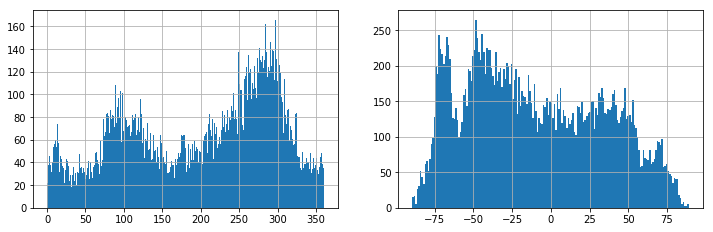

In [37]:
plt.subplot(221)
outliers.ra.hist(bins=360)
plt.subplot(222)
outliers.dec.hist(bins=180)

/Users/abombrun/anaconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


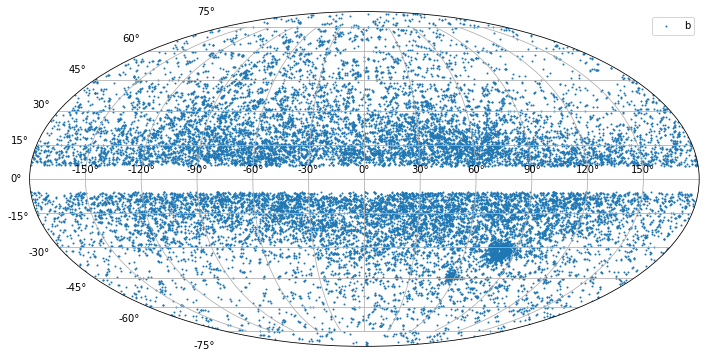

In [38]:
scale = u.deg.to(u.rad)
plt.subplot(111,projection="mollweide")
plt.scatter(-outliers.l*scale,outliers.b*scale,s=1)
plt.grid()
plt.legend()

In [39]:
outliers[:10]

,ra,dec,qsoid,hp,l,b
0,223.766046,-40.207401,6197329188957978634,44034,-32.879920,16.787282
1,73.416497,-67.463184,4661628825858211852,33122,-81.458957,-36.074587
2,124.196525,-16.715048,5720543495039483920,40646,-122.127207,10.311303
3,209.528421,-51.372440,6090222462761435158,43273,-46.587508,10.137415
4,324.712534,12.423866,1766984317629628447,12555,66.820466,-28.803886
5,234.696624,-41.549673,6002049498593886245,42647,-26.482259,11.174426
6,127.911291,76.178702,1137300571112341546,8081,137.749665,32.195478
7,118.185922,0.661356,3087323784873508943,21936,-140.546504,13.915321
8,117.515772,-49.563135,5517298564486660224,39202,-96.903032,-11.595551
9,78.106578,7.448621,3241725694501191853,23033,-165.762302,-18.082501


build gaia model error from DR1 Vizier

In [40]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = 100000
%time r = Vizier.get_catalogs(['VI/137/gum_mw']).values()[0]
gum = r.to_pandas()

CPU times: user 5.44 s, sys: 60.2 ms, total: 5.5 s
Wall time: 5.51 s


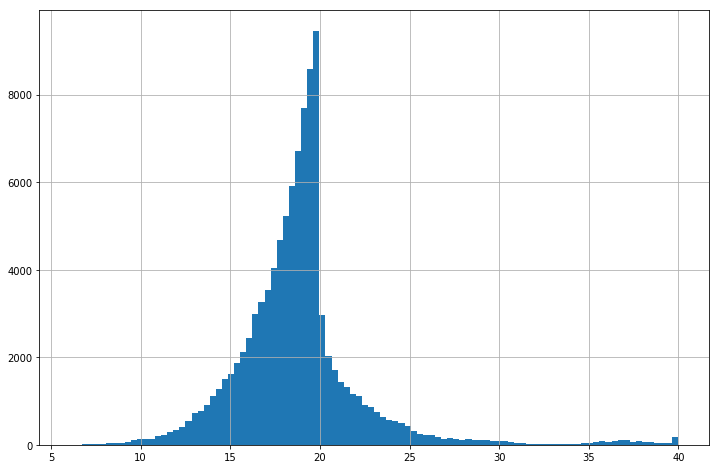

In [41]:
gum.Gmag.hist(bins=100)

In [42]:
def DR1error(g): 
    if g <= 15 :
        return 0.05 
    return 0.05*np.exp(0.2*(g-15)*(g-15))

DR1error = np.vectorize(DR1error)

def pm_error_DR2(g): 
    if g <= 15 :
        return 0.06
    return 0.06*np.exp(0.6*(g-15))

pm_error_DR2 = np.vectorize(pm_error_DR2)

def parallax_error_DR2(g): 
    if g <= 15 :
        return 0.04
    return 0.04*np.exp(0.5*(g-15)+0.01*(g-15)*(g-15))

parallax_error_DR2 = np.vectorize(parallax_error_DR2)

def randomFromData(data,n,range=(-1,1),bins=1000) : 
    """generate n random points following data distribution"""
    hist, bins = np.histogram(data, bins=bins,range=range)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [43]:
d0 = gum[(gum.Gmag<21)& (gum.Gmag>3)]
outliers['phot_g_mean_mag'] = randomFromData(d0.Gmag,len(outliers),range=(3,21))
outliers['pmra'] = randomFromData(d0.pmRA,len(outliers),range=(-100,100))
outliers['pmdec'] = randomFromData(d0.pmDE,len(outliers),range=(-100,100))
outliers['ra_error'] = DR1error(outliers.phot_g_mean_mag)
outliers['dec_error'] = outliers['ra_error']
outliers['pmra_error'] = pm_error_DR2(outliers.phot_g_mean_mag)
outliers['pmdec_error'] = outliers['pmra_error']
outliers['parallax_error'] = parallax_error_DR2(outliers.phot_g_mean_mag)
outliers['astrometric_pseudo_colour'] = np.random.normal(1.6,0.2,len(outliers))

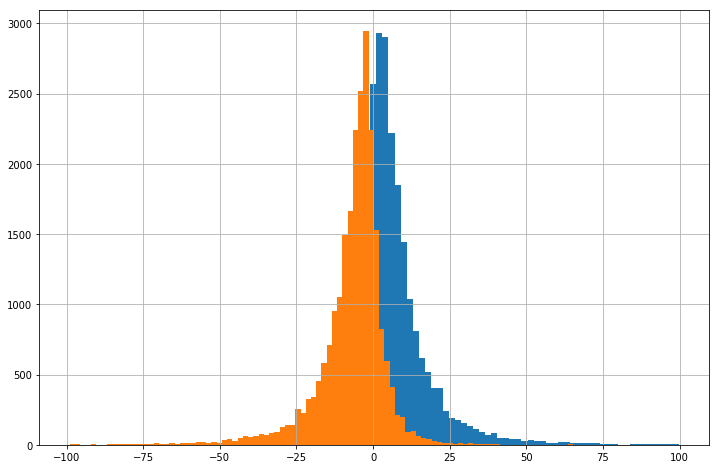

In [44]:
outliers.pmra.hist(bins=100)
outliers.pmdec.hist(bins=100)


I/337/tgas

In [45]:
Vizier.ROW_LIMIT = 100000
%time r = Vizier.get_catalogs(['I/337/tgas']).values()[0]
tgas = r.to_pandas()

CPU times: user 6.65 s, sys: 76.4 ms, total: 6.72 s
Wall time: 6.73 s


In [46]:
tgas.columns

Index(['HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS',
       'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_',
       'e__FG_', '__Gmag_', 'Var', '_RA.icrs', '_DE.icrs'],
      dtype='object')

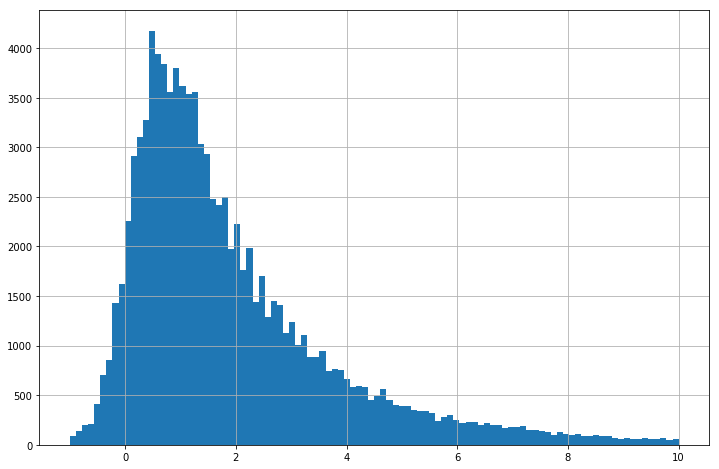

In [47]:
(tgas.Plx-0.5).hist(bins=100,range=(-1,10))

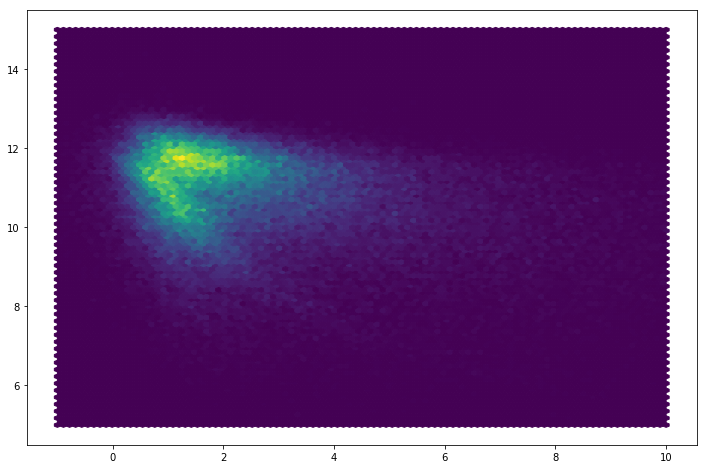

In [48]:
plt.hexbin(tgas.Plx,tgas['__Gmag_'],extent=(-1,10,5,15))

In [49]:
outliers['parallax'] = randomFromData(tgas.Plx,len(outliers),range=(-10,100))-2*outliers.parallax_error

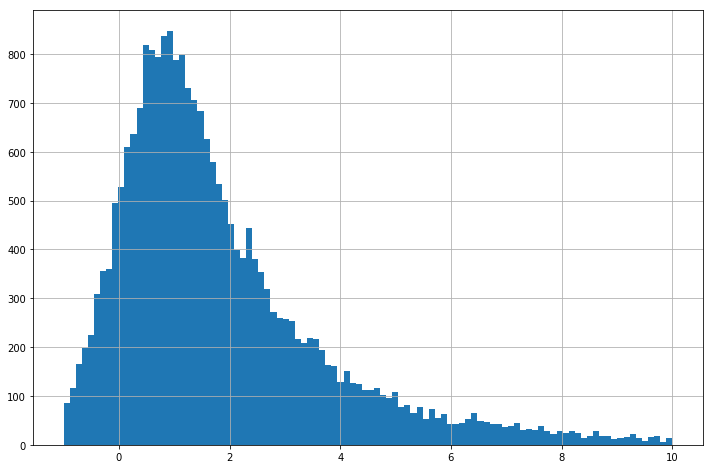

In [50]:
outliers.parallax.hist(bins=100,range=(-1,10))

In [51]:
outliers[:10]

,ra,dec,qsoid,hp,l,b,phot_g_mean_mag,pmra,pmdec,ra_error,dec_error,pmra_error,pmdec_error,parallax_error,astrometric_pseudo_colour,parallax
0,223.766046,-40.207401,6197329188957978634,44034,-32.879920,16.787282,20.883,14.3,-3.7,50.714179,50.714179,2.047029,2.047029,1.071137,1.711190,0.122725
1,73.416497,-67.463184,4661628825858211852,33122,-81.458957,-36.074587,17.967,0.3,0.1,0.290801,0.290801,0.355863,0.355863,0.192560,1.586729,6.939879
2,124.196525,-16.715048,5720543495039483920,40646,-122.127207,10.311303,18.291,1.9,-16.7,0.436225,0.436225,0.432224,0.432224,0.231062,1.773066,0.812876
3,209.528421,-51.372440,6090222462761435158,43273,-46.587508,10.137415,17.031,5.3,-8.5,0.114093,0.114093,0.202947,0.202947,0.115080,1.818696,0.604840
4,324.712534,12.423866,1766984317629628447,12555,66.820466,-28.803886,17.733,16.3,-9.9,0.222712,0.222712,0.309248,0.309248,0.169029,1.585263,4.346941
5,234.696624,-41.549673,6002049498593886245,42647,-26.482259,11.174426,20.037,7.7,-1.1,7.992803,7.992803,1.232185,1.232185,0.639760,1.512395,10.775480
6,127.911291,76.178702,1137300571112341546,8081,137.749665,32.195478,19.353,15.3,-6.9,2.212204,2.212204,0.817413,0.817413,0.426182,1.212922,-0.787363
7,118.185922,0.661356,3087323784873508943,21936,-140.546504,13.915321,16.761,-2.7,-3.5,0.092967,0.092967,0.172594,0.172594,0.099523,1.555720,1.185954
8,117.515772,-49.563135,5517298564486660224,39202,-96.903032,-11.595551,17.967,-1.7,-1.5,0.290801,0.290801,0.355863,0.355863,0.192560,1.413796,0.009879
9,78.106578,7.448621,3241725694501191853,23033,-165.762302,-18.082501,15.483,4.3,-4.5,0.052388,0.052388,0.080170,0.080170,0.051045,1.574779,1.392910


In [52]:
outliers['source_id'] = hpX.angle2pixel(outliers.ra,outliers.dec)*hpX.s + outliers.index

In [53]:
outliers['type'] = "STAR"

In [54]:
columns = ['ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_mag',
       'source_id', 'astrometric_pseudo_colour','qsoid','type']

# LQSO

In [63]:
randomLensedQSO = sierd.generateLQSO(100)

In [64]:
randomLensedQSO['ra'] = randomLensedQSO.ra*u.rad.to(u.deg)
randomLensedQSO['dec'] = randomLensedQSO.dec*u.rad.to(u.deg)
randomLensedQSO['ra_error'] = DR1error(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['dec_error'] = randomLensedQSO['ra_error']
randomLensedQSO['pmra_error'] = pm_error_DR2(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['pmdec_error'] = randomLensedQSO['pmra_error']
randomLensedQSO['parallax_error'] = parallax_error_DR2(randomLensedQSO.phot_g_mean_mag)
randomLensedQSO['parallax'] = np.random.normal(0,randomLensedQSO.parallax_error)
randomLensedQSO['type']='LQSO_true'
randomLensedQSO.index = randomLensedQSO.source_id

In [65]:
g = randomLensedQSO[randomLensedQSO.source_id==randomLensedQSO.qsoid].copy()
g[:10]

,ra,dec,pmra,pmdec,phot_g_mean_mag,source_id,qsoid,ra_error,dec_error,pmra_error,pmdec_error,parallax_error,parallax,type
source_id,,,,,,,,,,,,,,
1040933765567409702,133.524261,59.551417,-0.071897,0.376818,17.921371,1040933765567409702,1040933765567409702,0.275587,0.275587,0.346252,0.346252,0.187712,-0.167032,LQSO_true
6475147857239833832,305.846419,-51.929183,0.074132,0.028938,17.918290,6475147857239833832,6475147857239833832,0.274598,0.274598,0.345613,0.345613,0.187389,0.029115,LQSO_true
5696059326376918926,124.958803,-24.844211,0.084380,0.132268,17.924687,5696059326376918926,5696059326376918926,0.276658,0.276658,0.346942,0.346942,0.188060,0.197660,LQSO_true
670078316871647037,120.303306,19.236387,0.051538,0.110447,17.848254,670078316871647037,670078316871647037,0.253289,0.253289,0.331390,0.331390,0.180212,0.059587,LQSO_true
5212498350566887134,106.813375,-77.323388,-0.581689,0.317653,17.394076,5212498350566887134,5212498350566887134,0.157330,0.157330,0.252343,0.252343,0.140223,0.130387,LQSO_true
6697836781575877594,301.587436,-35.076742,-1.230606,1.946478,15.920456,6697836781575877594,6697836781575877594,0.059233,0.059233,0.104232,0.104232,0.063917,-0.088306,LQSO_true
5143441304900683237,33.535839,-18.215941,0.153497,-0.350748,18.898657,5143441304900683237,5143441304900683237,1.045164,1.045164,0.622373,0.622373,0.327080,-0.126501,LQSO_true
566686345120719645,2.610005,81.087212,0.087940,-0.023552,17.322139,566686345120719645,566686345120719645,0.147008,0.147008,0.241683,0.241683,0.134811,0.093322,LQSO_true
6362525725006191038,299.013500,-78.808597,-0.107809,0.238834,18.878875,6362525725006191038,6362525725006191038,1.013492,1.013492,0.615029,0.615029,0.323362,-0.535917,LQSO_true


In [66]:
len(g)

100

In [67]:
g['astrometric_pseudo_colour'] = np.random.normal(1.6,0.2,len(g))

In [68]:
randomLensedQSO = randomLensedQSO.join(g['astrometric_pseudo_colour'],on='qsoid')

In [69]:
randomLensedQSO['astrometric_pseudo_colour'] = np.random.normal(randomLensedQSO.astrometric_pseudo_colour,0.05)

In [70]:
randomLensedQSO[columns][:10]

,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,source_id,astrometric_pseudo_colour,qsoid,type
source_id,,,,,,,,,,,,,,,
1040933742642796176,133.524884,0.696584,59.551908,0.696584,-0.245113,0.280106,0.263841,0.529452,0.026779,0.529452,18.629163,1040933742642796176,1.829840,1040933765567409702,LQSO_true
1040933765567409702,133.524261,0.275587,59.551417,0.275587,-0.167032,0.187712,-0.071897,0.346252,0.376818,0.346252,17.921371,1040933765567409702,1.710643,1040933765567409702,LQSO_true
6475147857239833832,305.846419,0.274598,-51.929183,0.274598,0.029115,0.187389,0.074132,0.345613,0.028938,0.345613,17.918290,6475147857239833832,1.649042,6475147857239833832,LQSO_true
6475147867619082903,305.846670,12.666309,-51.929302,12.666309,-1.074222,0.732079,-0.004820,1.409055,0.037048,1.409055,20.260550,6475147867619082903,1.731514,6475147857239833832,LQSO_true
6475147843895033547,305.847010,0.392441,-51.929067,0.392441,0.043042,0.220681,0.077712,0.411632,0.029151,0.411632,18.209644,6475147843895033547,1.728622,6475147857239833832,LQSO_true
6475147852280369514,305.846611,26.474437,-51.928947,26.474437,-0.118811,0.900055,-0.011617,1.727311,0.017503,1.727311,20.599961,6475147852280369514,1.638751,6475147857239833832,LQSO_true
5696059326376918926,124.958803,0.276658,-24.844211,0.276658,0.197660,0.188060,0.084380,0.346942,0.132268,0.346942,17.924687,5696059326376918926,1.497572,5696059326376918926,LQSO_true
5696059296763687405,124.958558,1.809534,-24.843570,1.809534,0.500151,0.397955,0.016428,0.762015,-0.046329,0.762015,19.236037,5696059296763687405,1.510709,5696059326376918926,LQSO_true
670078293446642372,120.303761,12.323012,19.236645,12.323012,1.229558,0.726310,-0.013337,1.398045,0.090683,1.398045,20.247476,670078293446642372,1.544715,670078316871647037,LQSO_true


# Merge QSO, STAR, LQSO in one table

In [71]:
qso_outliers_lens = pd.concat([d[columns],outliers[columns],randomLensedQSO[columns]])

In [72]:
qso_outliers_lens.columns

Index(['ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_mag',
       'source_id', 'astrometric_pseudo_colour', 'qsoid', 'type'],
      dtype='object')

In [73]:
qso_outliers_lens.groupby(qso_outliers_lens.type).type.count()

type
LQSO       256
QSO     393907
STAR     23325
Name: type, dtype: int64

In [74]:
qso_outliers_lens.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417488 entries, 0 to 4584606591488214664
Columns: 15 entries, ra to type
dtypes: float64(12), int64(2), object(1)
memory usage: 51.0+ MB


Text(0.5,1,'ALLwise DR2 expectation')

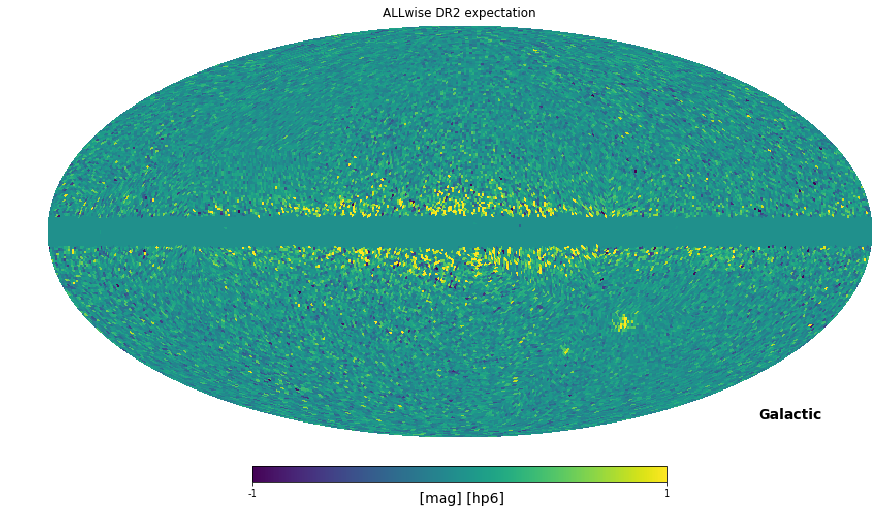

In [76]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='parallax')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.viridis,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

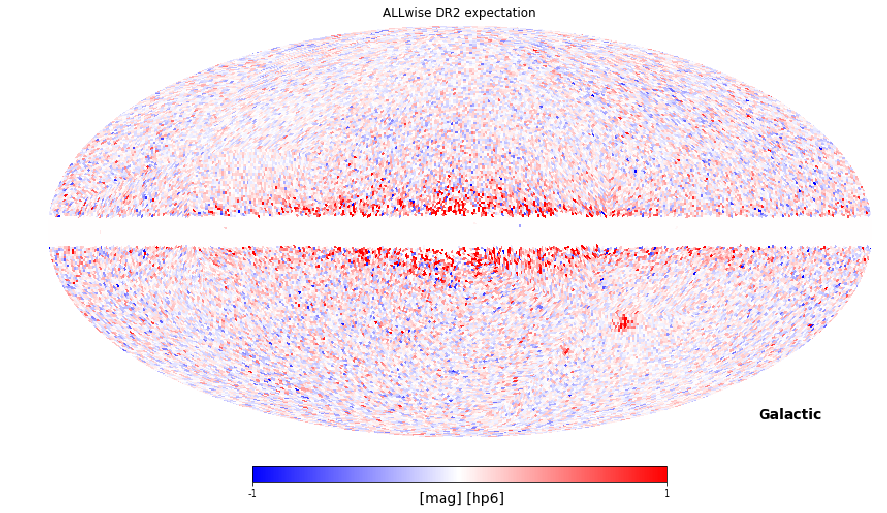

In [77]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='parallax')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

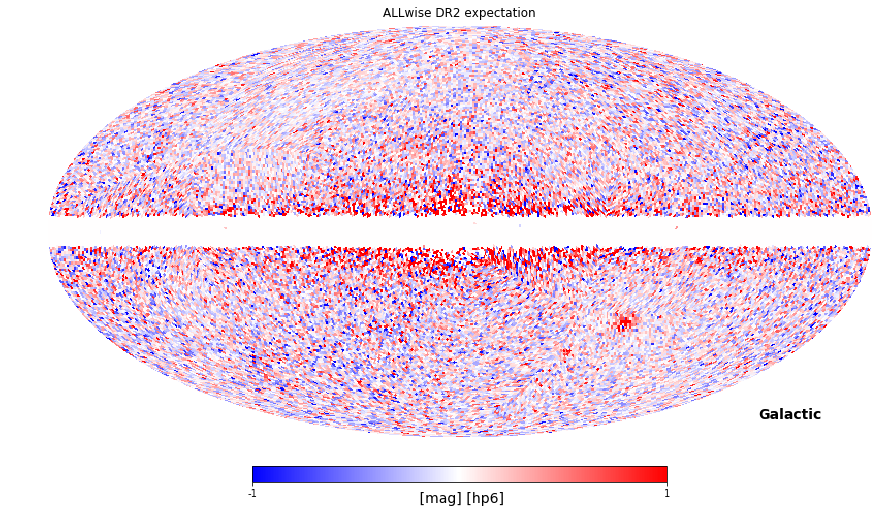

In [78]:
hpX = hp.gaiapix(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='pmra')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

Text(0.5,1,'ALLwise DR2 expectation')

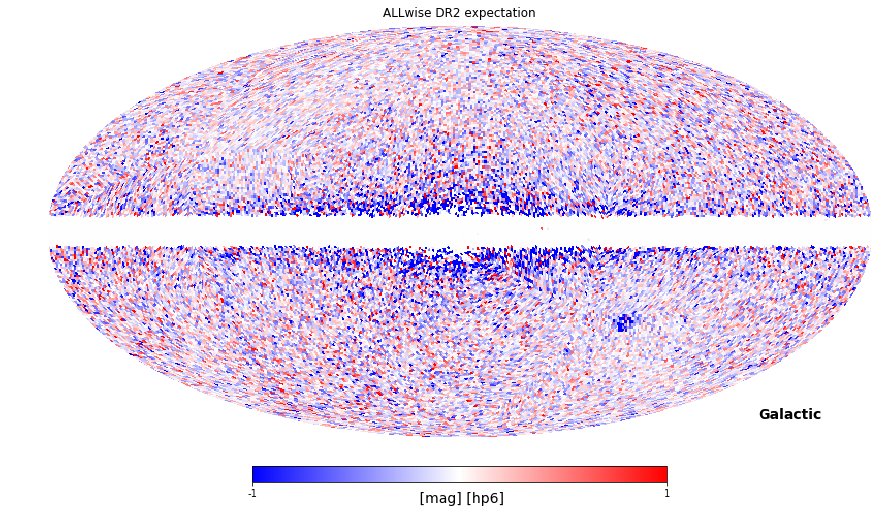

In [82]:
hpX = hpExpr(level)
hpX.setValues(qso_outliers_lens,sourceId='source_id',keyValue='pmdec')
f = plt.figure()
hpX.plot(f,vmin=-1,vmax=1,cmap=mp.cm.bwr,coord='G',unit=" [mag]")
plt.title("ALLwise DR2 expectation")

In [79]:
qso_outliers_lens.to_csv("../data/simDataSet1.csv.gzip",compression='gzip')

In [80]:
ls -lh ../data/simDataSet1.csv.gzip

-rw-r--r--  1 abombrun  staff    38M Apr 24 12:15 ../data/simDataSet1.csv.gzip
